## 3. 평균 이동

### 평균 이동(Mean Shift) 개요

- 평균이동은 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행한다.
- K-평균은 소속된 데이터의 평균 거리 중심으로 이동하는데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킨다.
- 확률 밀도 함수(pdf) 이용. KDE를 이용
- 평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식을 취한다. 이를 계속 반복하며 데이터의 군집 중심점을 찾아낸다.

#### KDE는 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법이다.

- 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률밀도함수 추정.

$$ KDE = \frac{1}{n}\sum_{i=1}^n K_h(x-x_i) = \frac{1}{nh}\sum_{i=1}^n K(\frac{x-x_i}{h}) $$

- 대역폭 h는 KDE 형태를 부드러운 형태로 평활화(Smoothing)하는 데 적용되며, h를 어떻게 설정하느냐가 확률 밀도 추정 성능을 크게 좌우!
    - 작은 h는 좁고 뾰족한 KDE를 가지며 이는 과적합되기 쉽다.
    - 큰 h는 과도하게 평활화된 KDE로 이는 과소적합하기 쉽다.
        - **적절한 대역폭 h 결정 필요!!!**

#### 사이킷런에서는 평균 이동 군집화를 위해 MeanShift 클래스를 제공

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [2]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [3]:
from sklearn.cluster import estimate_bandwidth # 최적화된 대역폭 h 제공

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [4]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))    

cluster labels 유형: [0 1 2]


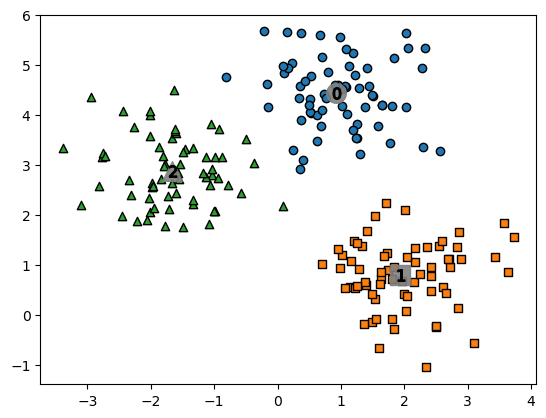

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [6]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64
